## Haar Cascade
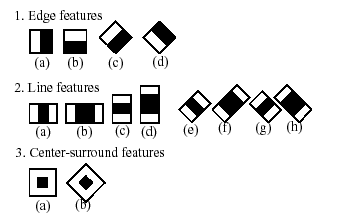

캐스케이드(cascade)는 분류기가 몇 개의 분류단계로 구성돼있음을 의미함

하르 캐스케이드(haar cascade)는 openCV에서 제공하는 객체검출 알고리즘이며, 코드에서 사용한 xml 파일은 정면 얼굴에 대해 미리 학습한 분류기임 haar feature는 영역과 영역의 밝기 차이를 이용함

눈을 검출할 때는 얼굴검출 후 얼굴 영역 안에서 눈을 검출하는 게 효과적임

[xml 파일 다운로드(출처 opencv 깃허브)](https://github.com/opencv/opencv/tree/master/data/haarcascades)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
file='haarcascade_frontalface_alt.xml'
cascade=cv2.CascadeClassifier(file)

cap=cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 720)    #또는 cap.set(3, 720)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 600)   #또는 cap.set(4, 600)

while True:
    ret,img=cap.read() #retval과 image를 반환함
    
    img=cv2.flip(img, 1)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    face=cascade.detectMultiScale(gray, 1.3, 5) #좌표를 반환함
    
    for (x,y,w,h) in face:
        cv2.rectangle(gray, (x,y), (x+w,y+h), (255,255,0), 3) #순서대로 이미지, 좌표, 색깔, 두께
        
    cv2.imshow('cam', gray)
    
    key=cv2.waitKey(1)
    if key==27: break
        
cap.release()
cv2.destroyAllWindows()    

- read는 retval과 image 2개를 반환함, flip으로 image를 좌우대칭시켜줌(1은 좌우, 2는 상하)
- esc키를 눌러야 윈도우창이 닫힘
- detectMultiScale에는 img는 물론 scaleFactor, minNeighbors, minSize, maxSize를 설정할 수 있음

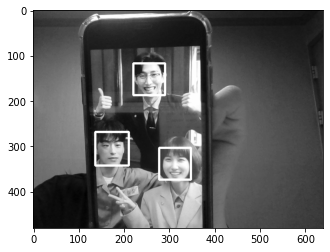

In [7]:
plt.imshow(gray, cmap='gray')

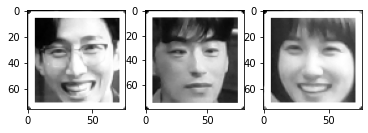

In [10]:
for i in range(len(face)):
    plt.subplot(1,len(face),i+1)
    x,y,w,h=face[i]
    plt.imshow(gray[y-3:y+h+3, x-3:x+w+3], cmap='gray')

rectangle의 thickness를 3으로 설정했기 때문에 각 좌표에 빼고 더해줌